In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
#These are libraries for visualization 
import seaborn as sns
import matplotlib.pyplot as plt 
#Setting instances
sns.set()
%matplotlib inline


In [2]:
data = pd.read_csv('mpg_data.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Shape of data

In [4]:
data.shape

(398, 9)

Attributes data types

In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Looking for null values

In [6]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Casting horsepower to flot

In [8]:
data.shape

(398, 9)

Duplicates Values

In [9]:
data.duplicated().sum()

0

Unique values in different Columns

In [10]:
data.cylinders.unique() #cylinder column has 5 unique values

array([8, 4, 6, 3, 5], dtype=int64)

In [11]:
data['model year'].unique() #data['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [12]:
data.origin.unique() #The origin has three different values i.e. 1 for USA, 2 for Europe , 3 for Japan

array([1, 3, 2], dtype=int64)

In [13]:
data.horsepower.unique() #there is ? which represents missing value in horsepower column

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
data = data[data.horsepower != '?']

In [15]:
#Validting th changes in horsepower column
print('?' in data.horsepower)

False


In [16]:
#Shape of data  after changes
data.shape

(392, 9)

In [17]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Casting Hosrepower as float


In [18]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Features Engineering

First, i would like to add Power to Weight ratios column, because it has great impact in general on mileage

In [19]:
data['PW_ratio']= (data.horsepower / data.weight)

Creating Displacemnt in CC

In [20]:
data['DispCC']=data['displacement']* 16.3871

Calculating Engine displacement in liters

In [21]:
data['DispLitr']= data['DispCC']/1000

Shape of data after feature engineering

In [22]:
data.shape

(392, 12)

In [23]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,PW_ratio,DispCC,DispLitr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.034833,3185.848718,3.185849
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.005935,1714.811756,1.714812
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.020557,1114.322800,1.114323
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.030820,1720.645500,1.720646
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.034285,2474.452100,2.474452
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.038082,4518.742825,4.518743
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,0.072910,7456.130500,7.456131


# Here is some statistics about features 

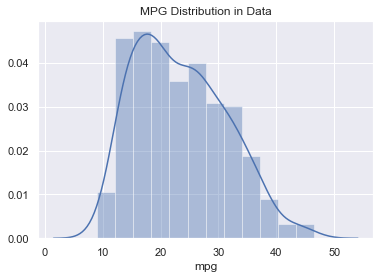

In [24]:
sns.distplot(data['mpg']);
plt.title('MPG Distribution in Data')
plt.show()

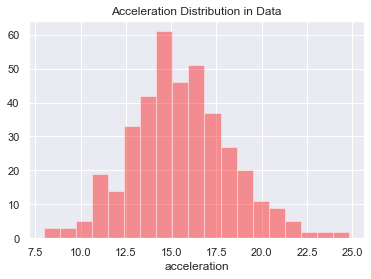

In [25]:
sns.distplot(data['acceleration'], hist=True, kde=False, color='red')
plt.title('Acceleration Distribution in Data')
plt.show()

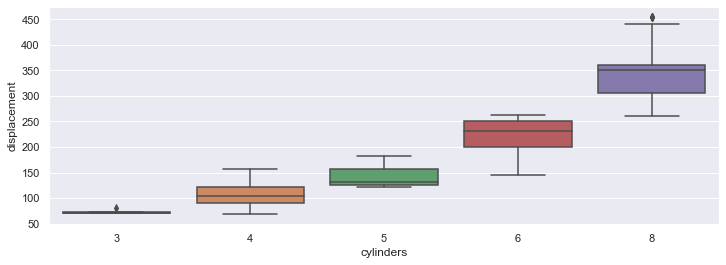

In [26]:
plt.figure(figsize=(12,4))
sns.boxplot(x='cylinders',y='displacement', data=data)
plt.show()

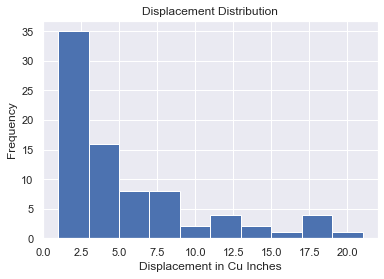

In [27]:
data['displacement'].value_counts().plot(kind='hist');
plt.xlabel('Displacement in Cu Inches')
plt.title('Displacement Distribution')
plt.show()

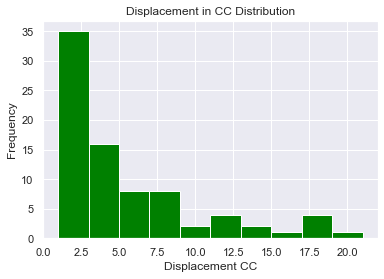

In [28]:
data['DispCC'].value_counts().plot(kind='hist', color='Green')
plt.xlabel('Displacement CC')
plt.title('Displacement in CC Distribution')
plt.show()

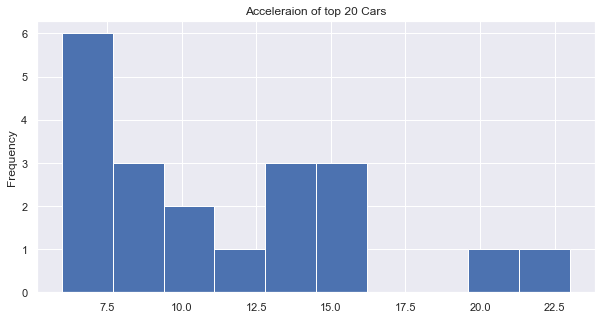

In [29]:
plt.figure(figsize=(10,5))
data['acceleration'].value_counts().head(20).plot(kind='hist', title='Acceleraion of top 20 Cars');

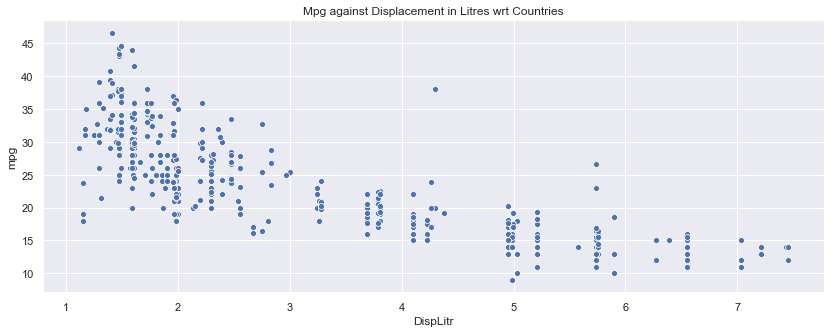

In [30]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='DispLitr', y='mpg', data=data)
plt.title('Mpg against Displacement in Litres wrt Countries')
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


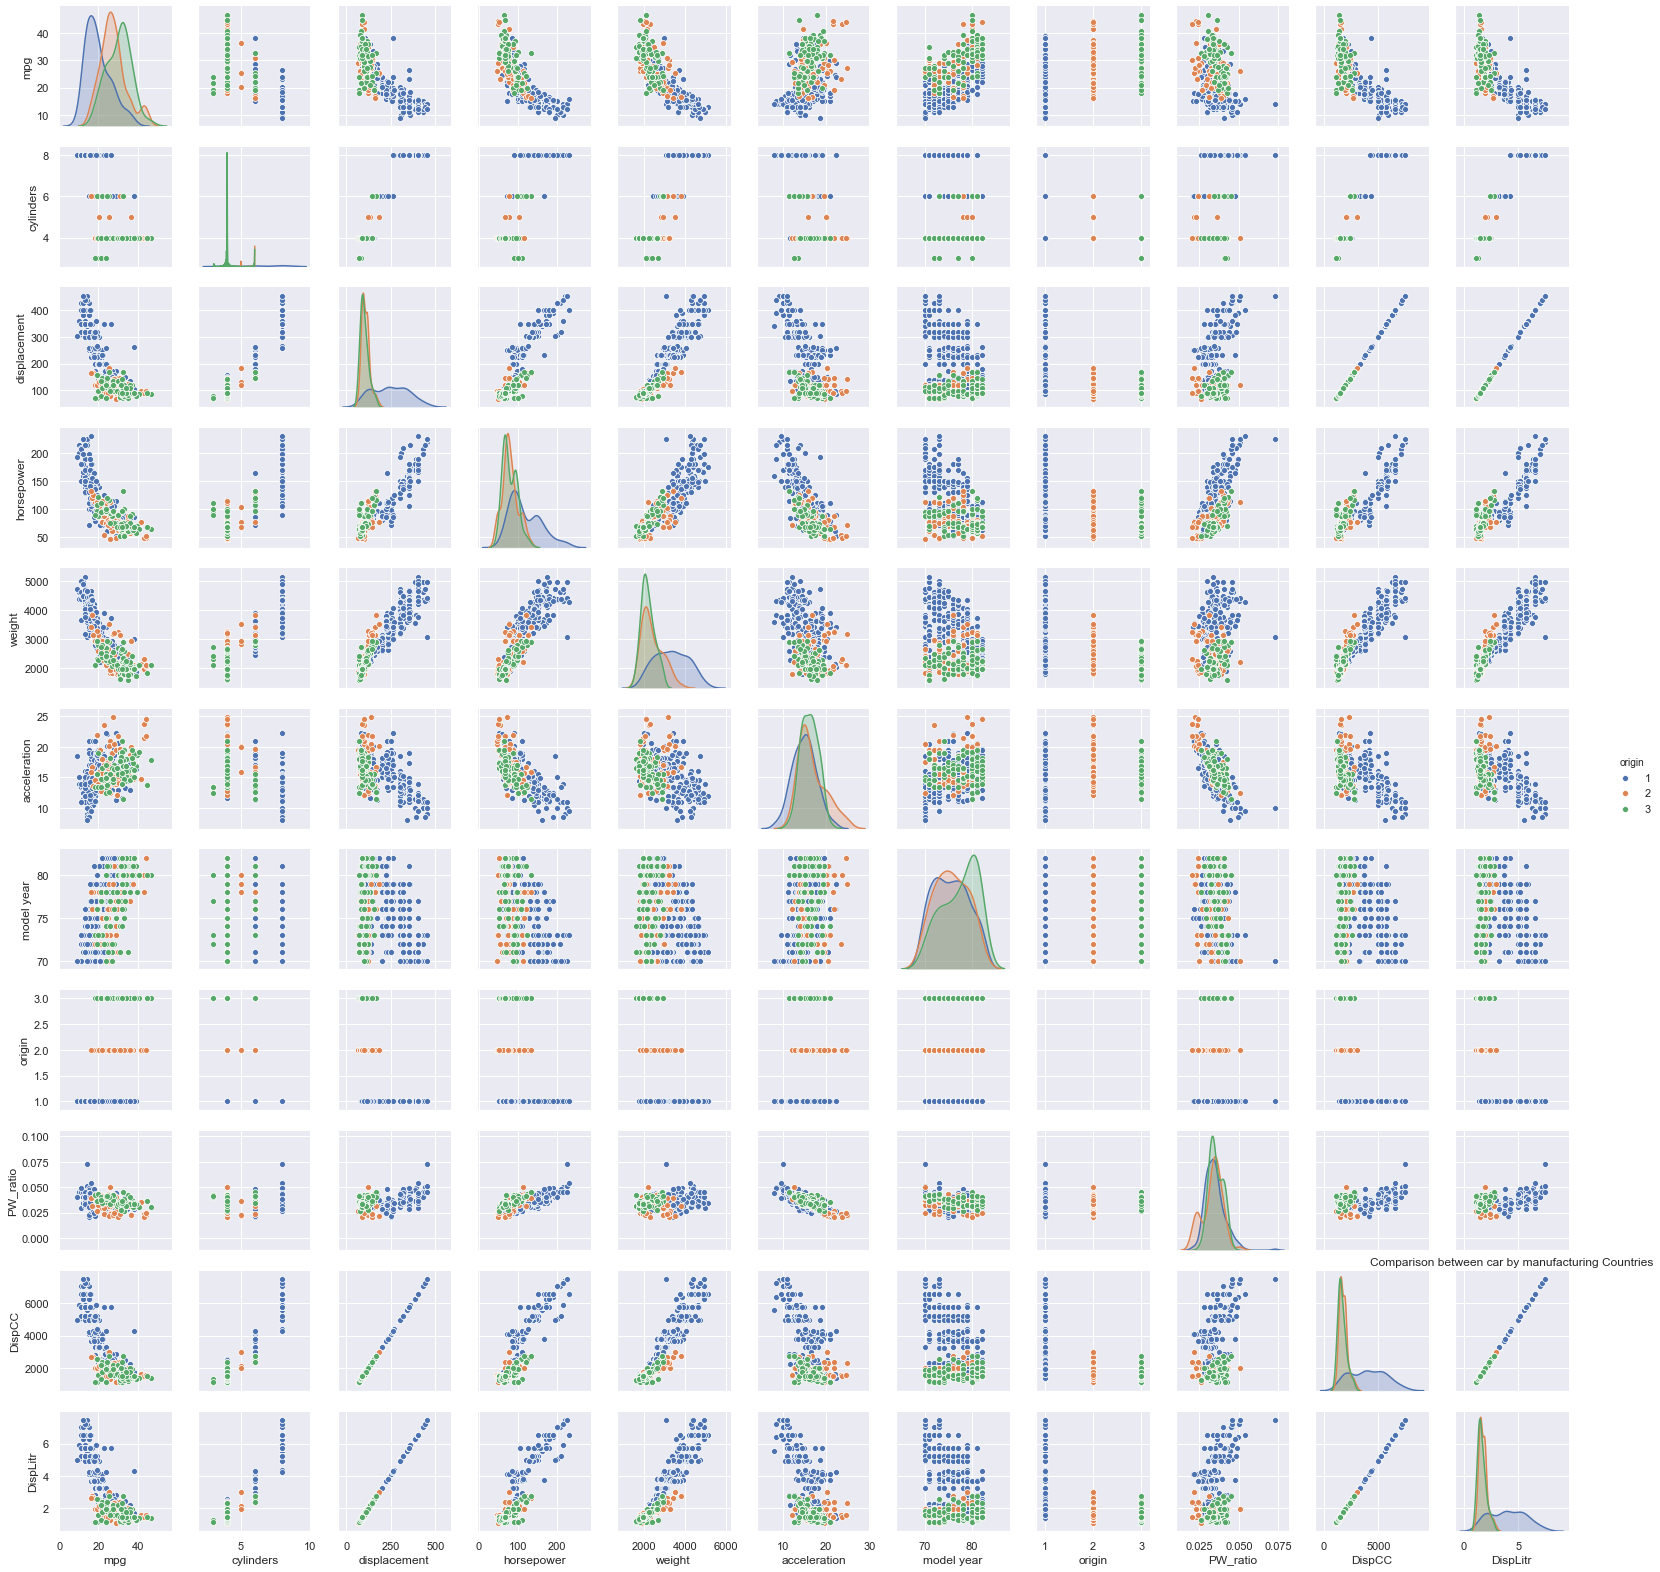

In [31]:
sns.pairplot(data, height = 2.0,hue ='origin')
plt.title('Comparison between car by manufacturing Countries')
plt.show()

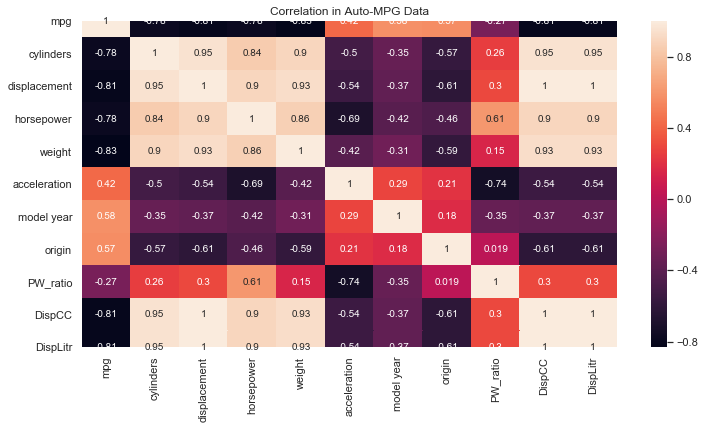

In [32]:
cor = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True)
plt.title('Correlation in Auto-MPG Data')
plt.show()